<h1 style="color:blue;">Bank Marketing Campaign</h1>

In [1]:
#Importar librerias
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [2]:
#carga de datos
dataOr = pd.read_excel('bank-additional-full.xlsx')

In [3]:
print(dataOr)

#Se actualiza nombre de columna
dataOr = dataOr.rename(columns={'emp.var.rate': 'emp_var_rate'})
dataOr = dataOr.rename(columns={'cons.price.idx': 'cons_price_idx'})
dataOr = dataOr.rename(columns={'cons.conf.idx': 'cons_conf_idx'})
dataOr = dataOr.rename(columns={'nr.employed': 'nr_employed'})

print(dataOr)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [4]:
dataOr.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
for column in dataOr:
    if dataOr[column].isnull().values.any():
        print (column +'='+'Sí tiene nulos')
    else:
        print (column +'='+'No tiene nulos')

age=No tiene nulos
job=No tiene nulos
marital=No tiene nulos
education=No tiene nulos
default=No tiene nulos
housing=No tiene nulos
loan=No tiene nulos
contact=No tiene nulos
month=No tiene nulos
day_of_week=No tiene nulos
duration=No tiene nulos
campaign=No tiene nulos
pdays=No tiene nulos
previous=No tiene nulos
poutcome=No tiene nulos
emp_var_rate=No tiene nulos
cons_price_idx=No tiene nulos
cons_conf_idx=No tiene nulos
euribor3m=No tiene nulos
nr_employed=No tiene nulos
y=No tiene nulos


In [6]:
dataOr.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Gráficas subscription
print(dataOr.y.value_counts())

yP = dataOr['y'].value_counts('1')*100
print(yP)

no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64


In [8]:
#Gráficas job
dataOr.pivot_table( 'y','job', aggfunc=np.count_nonzero, margins=True)

,y
job,
admin.,10422
blue-collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self-employed,1421
services,3969
student,875


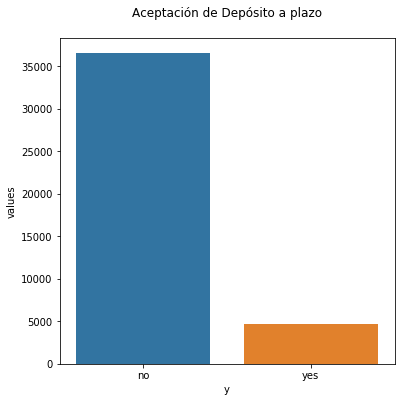

In [9]:
subscription = dataOr['y'].value_counts()
pSubscription = pd.DataFrame({'y': subscription.index,'values': subscription.values})
plt.figure(figsize = (6,6))
plt.title('Aceptación de Depósito a plazo\n ')
sns.set_color_codes("pastel")
sns.barplot(x = 'y', y='values', data=pSubscription)
locs, labels = plt.xticks()
plt.show()

In [10]:
#Gráficas marital
print(dataOr.marital.value_counts())

maritalP = dataOr['marital'].value_counts('1')*100
print(maritalP)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64


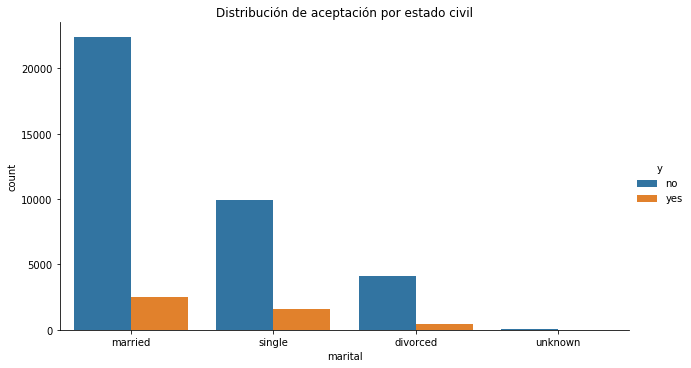

In [11]:
pMarital = sns.catplot('marital', data=dataOr, hue='y', kind='count', aspect=1.75)
pMarital.set_xlabels('marital')
pMarital.set(title= 'Distribución de aceptación por estado civil')


In [12]:
dataOr.pivot_table( 'age','y','marital', aggfunc=np.count_nonzero, margins=True)

marital,divorced,married,single,unknown,All
y,,,,,
no,4136,22396,9948,68,36548
yes,476,2532,1620,12,4640
All,4612,24928,11568,80,41188


No handles with labels found to put in legend.


Job / Subscription (No)


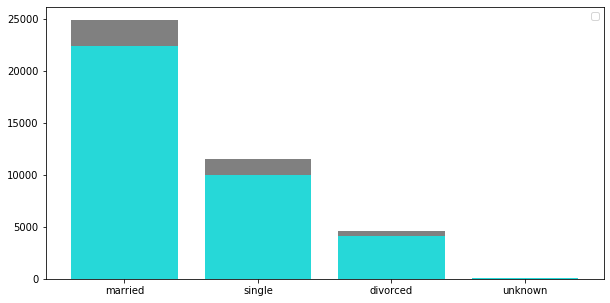

In [13]:
print("Job / Subscription (No)")
plt.figure(figsize=(10,5))
_JOB_RANGE= [0,1,2,3]


married= dataOr['marital'][dataOr['marital']=='married'].count()
married_default = dataOr['marital'][(dataOr['marital']=='married')&(dataOr['y']=='no')].count()

single=dataOr['marital'][dataOr['marital']=='single'].count()
single_default = dataOr['marital'][(dataOr['marital']=='single')&(dataOr['y']=='no')].count()

divorced=dataOr['marital'][dataOr['marital']=='divorced'].count()
divorced_default = dataOr['marital'][(dataOr['marital']=='divorced')&(dataOr['y']=='no')].count()

unknown=dataOr['marital'][dataOr['marital']=='unknown'].count()
unknown_default = dataOr['marital'][(dataOr['marital']=='unknown')&(dataOr['y']=='no')].count()


job_total = [married,single,divorced,unknown]
default_job_total = [married_default,single_default,divorced_default,unknown_default ]

plt.bar(_JOB_RANGE,job_total, color='gray')
plt.bar(_JOB_RANGE,default_job_total, color='cyan',alpha = 0.7)
plt.xticks([0,1,2,3],['married','single','divorced','unknown'])

plt.legend()
plt.show()


In [14]:
#Gráficas job
print(dataOr.job.value_counts())

jobP = dataOr['job'].value_counts('1')*100
print(jobP)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64


In [15]:
#Gráficas job
#dataOr.pivot_table( 'marital','y','job' aggfunc=np.count_nonzero, margins=True)
dataOr.pivot_table( 'age','job','y', aggfunc=np.count_nonzero, margins=True)

y,no,yes,All
job,,,
admin.,9070,1352,10422
blue-collar,8616,638,9254
entrepreneur,1332,124,1456
housemaid,954,106,1060
management,2596,328,2924
retired,1286,434,1720
self-employed,1272,149,1421
services,3646,323,3969
student,600,275,875


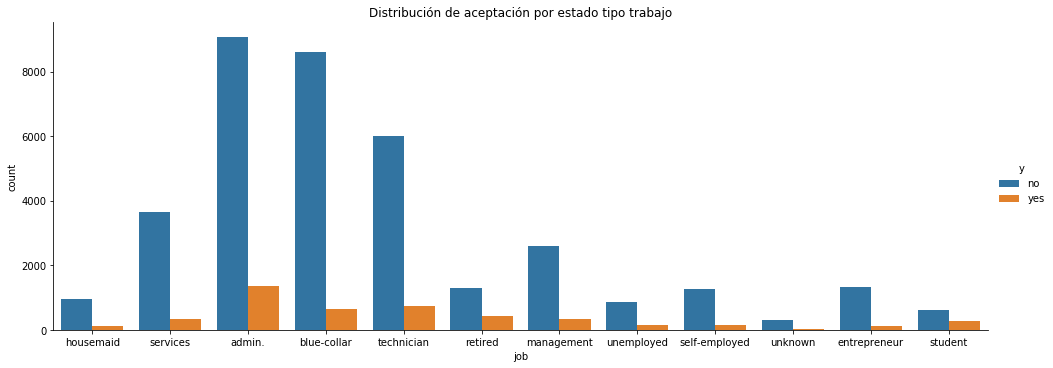

In [16]:
pJob = sns.catplot('job', data=dataOr, hue='y', kind='count', aspect=2.75)
pJob.set_xlabels('job')
pJob.set(title= 'Distribución de aceptación por estado tipo trabajo')

Job / Subscription (No)


No handles with labels found to put in legend.


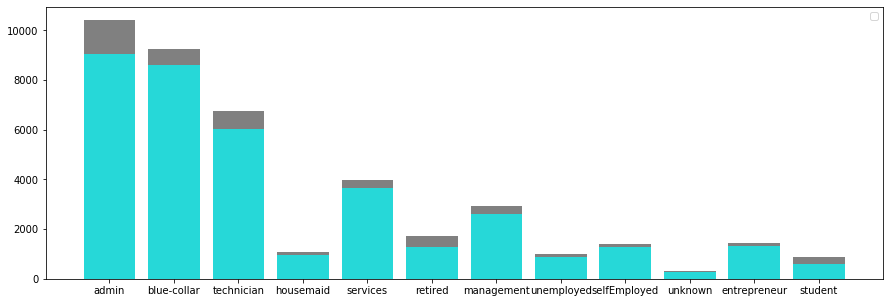

In [17]:
#Gráfica Job-Suscripción
print("Job / Subscription (No)")
plt.figure(figsize=(15,5))
_JOB_RANGE= [0,1,2,3,4,5,6,7,8,9,10,11]


housemaid= dataOr['job'][dataOr['job']=='housemaid'].count()
housemaid_default = dataOr['job'][(dataOr['job']=='housemaid')&(dataOr['y']=='no')].count()

services=dataOr['job'][dataOr['job']=='services'].count()
services_default = dataOr['job'][(dataOr['job']=='services')&(dataOr['y']=='no')].count()

admin=dataOr['job'][dataOr['job']=='admin.'].count()
admin_default = dataOr['job'][(dataOr['job']=='admin.')&(dataOr['y']=='no')].count()

blueCollar=dataOr['job'][dataOr['job']=='blue-collar'].count()
blueCollar_default = dataOr['job'][(dataOr['job']=='blue-collar')&(dataOr['y']=='no')].count()

technician=dataOr['job'][dataOr['job']=='technician'].count()
technician_default = dataOr['job'][(dataOr['job']=='technician')&(dataOr['y']=='no')].count()

retired=dataOr['job'][dataOr['job']=='retired'].count()
retired_default = dataOr['job'][(dataOr['job']=='retired')&(dataOr['y']=='no')].count()

management=dataOr['job'][dataOr['job']=='management'].count()
management_default = dataOr['job'][(dataOr['job']=='management')&(dataOr['y']=='no')].count()

unemployed=dataOr['job'][dataOr['job']=='unemployed'].count()
unemployed_default = dataOr['job'][(dataOr['job']=='unemployed')&(dataOr['y']=='no')].count()

selfEmployed=dataOr['job'][dataOr['job']=='self-employed'].count()
selfEmployed_default = dataOr['job'][(dataOr['job']=='self-employed')&(dataOr['y']=='no')].count()

unknown=dataOr['job'][dataOr['job']=='unknown'].count()
unknown_default = dataOr['job'][(dataOr['job']=='unknown')&(dataOr['y']=='no')].count()

entrepreneur=dataOr['job'][dataOr['job']=='entrepreneur'].count()
entrepreneur_default = dataOr['job'][(dataOr['job']=='entrepreneur')&(dataOr['y']=='no')].count()

student=dataOr['job'][dataOr['job']=='student'].count()
student_default = dataOr['job'][(dataOr['job']=='student')&(dataOr['y']=='no')].count()

job_total = [admin,blueCollar,technician,housemaid,services,retired,management,unemployed,selfEmployed,unknown,entrepreneur,student]
default_job_total = [admin_default,blueCollar_default,technician_default,housemaid_default,services_default,retired_default,management_default,unemployed_default,selfEmployed_default,unknown_default,entrepreneur_default,student_default]

plt.bar(_JOB_RANGE,job_total, color='gray')
plt.bar(_JOB_RANGE,default_job_total, color='cyan',alpha = 0.7)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['admin','blue-collar','technician','housemaid','services','retired','management','unemployed','selfEmployed','unknown','entrepreneur','student'])

plt.legend()
plt.show()

In [18]:
#Gráficas education
print(dataOr.education.value_counts())

educationP = dataOr['education'].value_counts('1')*100
print(educationP)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64


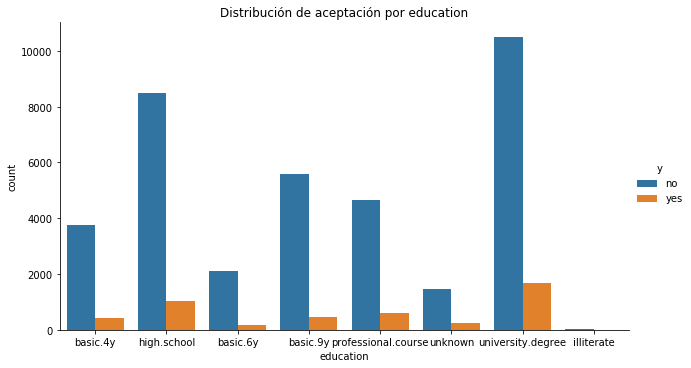

In [19]:
pEducation = sns.catplot('education', data=dataOr, hue='y', kind='count', aspect=1.75)
pEducation.set_xlabels('education')
pEducation.set(title= 'Distribución de aceptación por education')


In [20]:
dataOr.pivot_table( 'age','education','y', aggfunc=np.count_nonzero, margins=True)

y,no,yes,All
education,,,
basic.4y,3748,428,4176
basic.6y,2104,188,2292
basic.9y,5572,473,6045
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [21]:
#Gráficas default
print(dataOr.default.value_counts())

defaultP = dataOr['default'].value_counts('1')*100
print(defaultP)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64


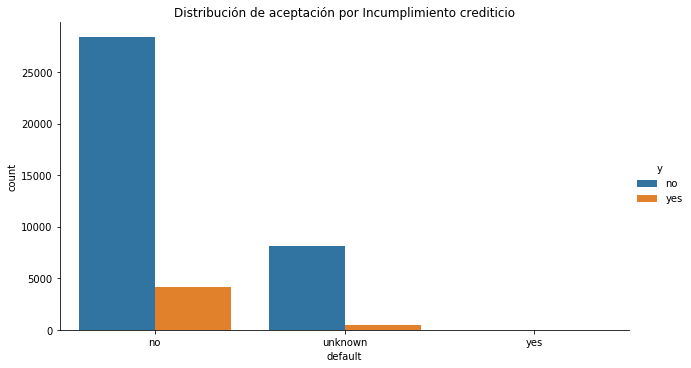

In [22]:
pDefault = sns.catplot('default', data=dataOr, hue='y', kind='count', aspect=1.75)
pDefault.set_xlabels('default')
pDefault.set(title= 'Distribución de aceptación por Incumplimiento crediticio')


In [23]:
dataOr.pivot_table( 'age','y','default', aggfunc=np.count_nonzero, margins=True)

default,no,unknown,yes,All
y,,,,
no,28391.0,8154.0,3.0,36548
yes,4197.0,443.0,NaN,4640
All,32588.0,8597.0,3.0,41188


Text(0.5, 1.0, "Distribución por edad'")

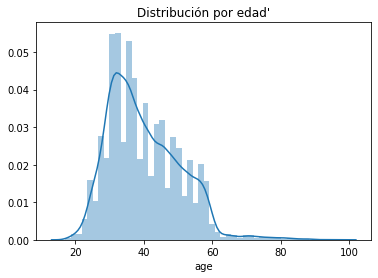

In [24]:
#Gráficas Edad
AGE = dataOr['age'].dropna()

age_dist = sns.distplot(AGE)
age_dist.set_title("Distribución por edad'")

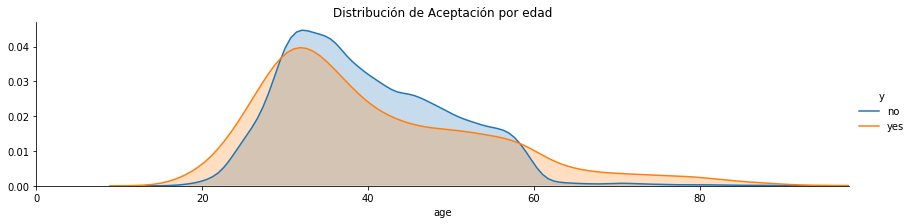

In [25]:
#1=male, 2=female
fig = sns.FacetGrid(dataOr, hue='y', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = dataOr['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución de Aceptación por edad')
fig.add_legend()

In [26]:
#Gráficas housing
print(dataOr.housing.value_counts())

housingP = dataOr['housing'].value_counts('1')*100
print(housingP)

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64


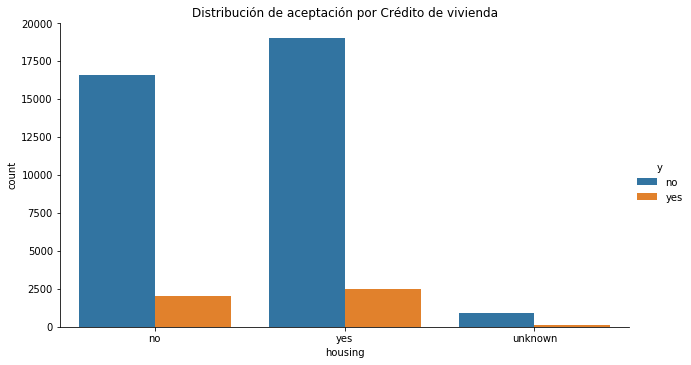

In [27]:
phousing = sns.catplot('housing', data=dataOr, hue='y', kind='count', aspect=1.75)
phousing.set_xlabels('housing')
phousing.set(title= 'Distribución de aceptación por Crédito de vivienda')

In [28]:
dataOr.pivot_table( 'age','y','housing', aggfunc=np.count_nonzero, margins=True)

housing,no,unknown,yes,All
y,,,,
no,16596,883,19069,36548
yes,2026,107,2507,4640
All,18622,990,21576,41188


In [29]:
#Gráficas loan
print(dataOr.loan.value_counts())

loanP = dataOr['loan'].value_counts('1')*100
print(loanP)

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
no         82.426920
yes        15.169467
unknown     2.403613
Name: loan, dtype: float64


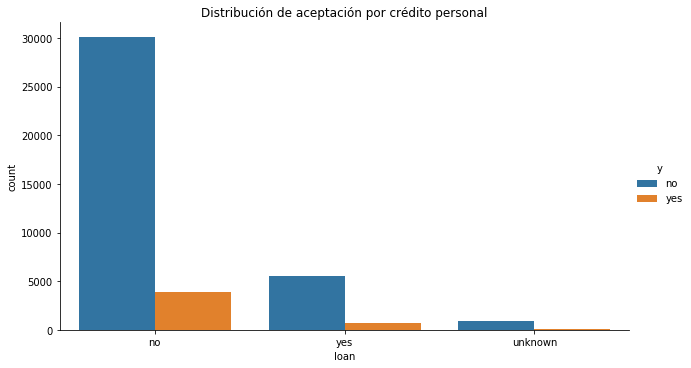

In [30]:
pLoan = sns.catplot('loan', data=dataOr, hue='y', kind='count', aspect=1.75)
pLoan.set_xlabels('loan')
pLoan.set(title= 'Distribución de aceptación por crédito personal')

In [31]:
dataOr.pivot_table( 'age','y','loan', aggfunc=np.count_nonzero, margins=True)

loan,no,unknown,yes,All
y,,,,
no,30100,883,5565,36548
yes,3850,107,683,4640
All,33950,990,6248,41188


In [32]:
#Gráficas contact
print(dataOr.contact.value_counts())

contactP = dataOr['contact'].value_counts('1')*100
print(contactP)

cellular     26144
telephone    15044
Name: contact, dtype: int64
cellular     63.474798
telephone    36.525202
Name: contact, dtype: float64


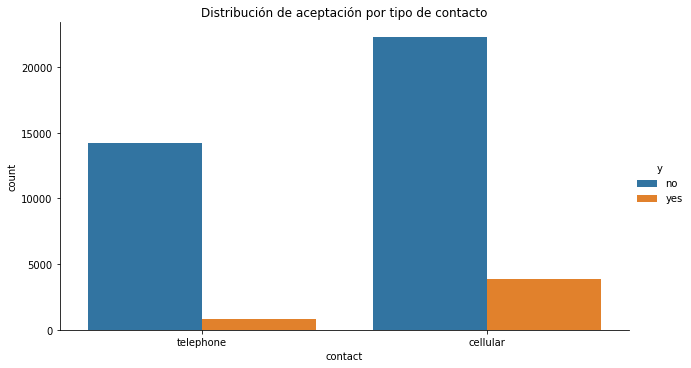

In [33]:
pContact = sns.catplot('contact', data=dataOr, hue='y', kind='count', aspect=1.75)
pContact.set_xlabels('contact')
pContact.set(title= 'Distribución de aceptación por tipo de contacto')

In [34]:
dataOr.pivot_table( 'age','y','contact', aggfunc=np.count_nonzero, margins=True)

contact,cellular,telephone,All
y,,,
no,22291,14257,36548
yes,3853,787,4640
All,26144,15044,41188


In [35]:
#Gráficas month
print(dataOr.month.value_counts())

monthP = dataOr['month'].value_counts('1')*100
print(monthP)

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: month, dtype: float64


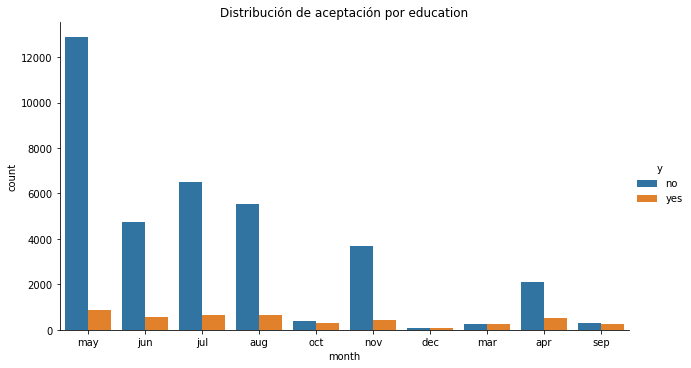

In [36]:
pmonth = sns.catplot('month', data=dataOr, hue='y', kind='count', aspect=1.75)
pmonth.set_xlabels('month')
pmonth.set(title= 'Distribución de aceptación por education')

In [37]:
dataOr.pivot_table( 'age','y','month', aggfunc=np.count_nonzero, margins=True)

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,All
y,,,,,,,,,,,
no,2093,5523,93,6525,4759,270,12883,3685,403,314,36548
yes,539,655,89,649,559,276,886,416,315,256,4640
All,2632,6178,182,7174,5318,546,13769,4101,718,570,41188


In [38]:
#Gráficas day_of_week
print(dataOr.day_of_week.value_counts())

dayOfWeekP = dataOr['day_of_week'].value_counts('1')*100
print(dayOfWeekP)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: day_of_week, dtype: float64


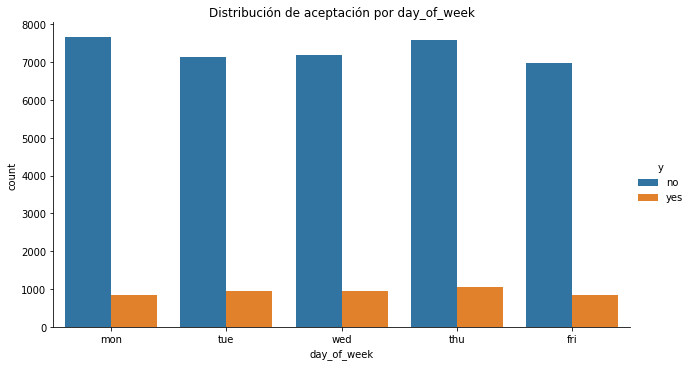

In [39]:
pDayOfWeek = sns.catplot('day_of_week', data=dataOr, hue='y', kind='count', aspect=1.75)
pDayOfWeek.set_xlabels('day_of_week')
pDayOfWeek.set(title= 'Distribución de aceptación por day_of_week')

In [40]:
dataOr.pivot_table( 'age','y','day_of_week', aggfunc=np.count_nonzero, margins=True)

day_of_week,fri,mon,thu,tue,wed,All
y,,,,,,
no,6981,7667,7578,7137,7185,36548
yes,846,847,1045,953,949,4640
All,7827,8514,8623,8090,8134,41188


In [41]:
#Gráficas campaign
print(dataOr.campaign.value_counts())

campaignP = dataOr['campaign'].value_counts('1')*100
print(campaignP)

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64
1     42.832864
2     25.662814
3     12.967369
4      6.436341
5      3.882199
6      2.376906
7      1.527144
8      0.971157
9      0.687093
10     0.546276
11     0.429737
12     0.303486
13     0.223366
14     0.167525
17     0.140818
15     0.123822
16     0.123822
18     0.080120
20     0.072837
19     0.063125
21     0.058269
22     0.041274
23     0.038846
24     0.036418
27     0.026707
29     0.024279
25     0.019423
26     0.019423
28     0.019423
30 

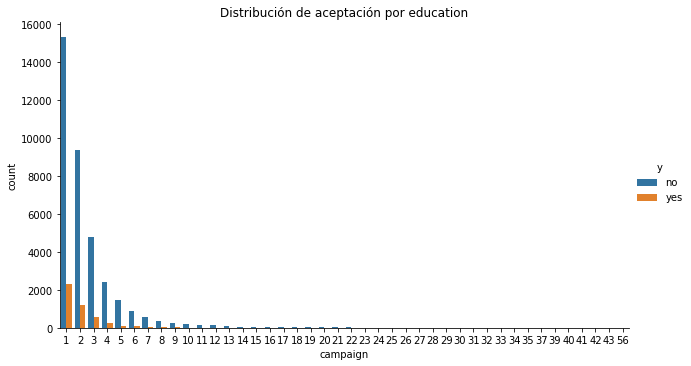

In [42]:
pCampaign = sns.catplot('campaign', data=dataOr, hue='y', kind='count', aspect=1.75)
pCampaign.set_xlabels('campaign')
pCampaign.set(title= 'Distribución de aceptación por education')

In [43]:
dataOr.pivot_table( 'age','y','campaign', aggfunc=np.count_nonzero, margins=True)

campaign,1,2,3,4,5,6,7,8,9,10,...,34,35,37,39,40,41,42,43,56,All
y,,,,,,,,,,,,,,,,,,,,,
no,15342.0,9359.0,4767.0,2402.0,1479.0,904.0,591.0,383.0,266.0,213.0,...,3.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,36548
yes,2300.0,1211.0,574.0,249.0,120.0,75.0,38.0,17.0,17.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4640
All,17642.0,10570.0,5341.0,2651.0,1599.0,979.0,629.0,400.0,283.0,225.0,...,3.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,41188


In [44]:
#Gráficas pOutcome
print(dataOr.poutcome.value_counts())

outcomeP = dataOr['poutcome'].value_counts('1')*100
print(outcomeP)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: poutcome, dtype: float64


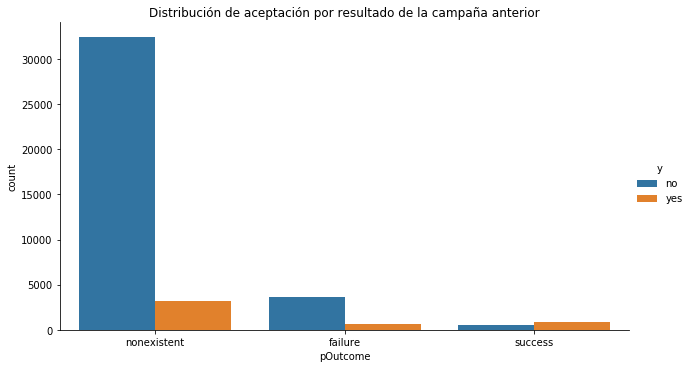

In [45]:
pOutcome = sns.catplot('poutcome', data=dataOr, hue='y', kind='count', aspect=1.75)
pOutcome.set_xlabels('pOutcome')
pOutcome.set(title= 'Distribución de aceptación por resultado de la campaña anterior')

In [46]:
dataOr.pivot_table( 'age','y','poutcome', aggfunc=np.count_nonzero, margins=True)

poutcome,failure,nonexistent,success,All
y,,,,
no,3647,32422,479,36548
yes,605,3141,894,4640
All,4252,35563,1373,41188


In [47]:
data=dataOr
dataDV = pd.get_dummies(dataOr[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']],prefix=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'],drop_first=  True)


data = pd.concat([data,dataDV],axis=1)
#data= pd.concat([data,temp],axis=1)

In [48]:
print(dataOr)
print(dataOr.columns)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [49]:
#eliminar columnas
data.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis='columns', inplace=True)

In [50]:
data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [51]:
features = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
        'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
x = data.loc[:,features].values
y = data.loc[:,['y_yes']].values #target var

In [52]:
#Estandarizar datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) 

In [53]:
pd.DataFrame(data = X, columns = features).head()

,age,campaign,pdays,previous,emp_var_rate,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.886447,0.71246,0.33168,-0.538317,-0.19143,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.886447,0.71246,0.33168,-0.538317,-0.19143,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.886447,0.71246,0.33168,-0.538317,-0.19143,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.886447,0.71246,0.33168,-0.538317,-0.19143,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.886447,0.71246,0.33168,-0.538317,-0.19143,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [54]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20']) #PC = Principal component 
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-39.900938,-17.768965,16.307537,2.983188,-1.629326,0.920589,-0.246118,-0.309408,-0.432924,0.372244,-0.267643,-0.045665,0.623493,-0.187433,0.125232,0.285309,-0.488988,-0.479217,-0.015739,-0.118605
1,-39.899276,-17.769317,17.303803,2.905296,-1.632370,1.035139,-0.413561,-0.724136,0.215089,0.749315,-0.671057,-0.415379,0.455954,-0.339511,0.099638,0.319071,-0.674249,0.419043,0.300384,-0.163321
2,-39.937321,-17.778238,-2.647455,4.296464,-1.560193,0.923594,-0.518473,-0.225222,0.531085,0.075771,-1.251086,-0.428374,0.453382,-0.306770,0.068201,0.269865,-0.427027,-0.305558,-0.061054,-0.219943
3,-39.931586,-17.777170,0.350805,4.095050,-1.570759,0.949913,-0.554626,-0.075502,-0.423223,0.373716,-0.218711,-0.064990,0.642534,-0.196433,0.103453,0.287298,-0.461024,-0.370863,0.066595,-0.130403
4,-39.900997,-17.768829,16.299749,2.975454,-1.628747,0.956479,-0.273566,-0.629763,0.207465,0.774551,-0.862395,-0.383441,0.443426,-0.297008,0.135691,0.261869,-0.600768,-0.425443,-0.020672,0.861454


In [55]:
finalDf = pd.concat([principalDf,data[['y_yes']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,y_yes
0,-39.900938,-17.768965,16.307537,2.983188,-1.629326,0.920589,-0.246118,-0.309408,-0.432924,0.372244,...,-0.045665,0.623493,-0.187433,0.125232,0.285309,-0.488988,-0.479217,-0.015739,-0.118605,0
1,-39.899276,-17.769317,17.303803,2.905296,-1.632370,1.035139,-0.413561,-0.724136,0.215089,0.749315,...,-0.415379,0.455954,-0.339511,0.099638,0.319071,-0.674249,0.419043,0.300384,-0.163321,0
2,-39.937321,-17.778238,-2.647455,4.296464,-1.560193,0.923594,-0.518473,-0.225222,0.531085,0.075771,...,-0.428374,0.453382,-0.306770,0.068201,0.269865,-0.427027,-0.305558,-0.061054,-0.219943,0
3,-39.931586,-17.777170,0.350805,4.095050,-1.570759,0.949913,-0.554626,-0.075502,-0.423223,0.373716,...,-0.064990,0.642534,-0.196433,0.103453,0.287298,-0.461024,-0.370863,0.066595,-0.130403,0
4,-39.900997,-17.768829,16.299749,2.975454,-1.628747,0.956479,-0.273566,-0.629763,0.207465,0.774551,...,-0.383441,0.443426,-0.297008,0.135691,0.261869,-0.600768,-0.425443,-0.020672,0.861454,0


# gráfica
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y_yes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

In [56]:
pca.explained_variance_ratio_

array([8.87408575e-01, 1.09076205e-01, 2.70382587e-03, 5.09691612e-04,
       1.86239005e-04, 1.64243648e-05, 9.71508658e-06, 7.55312100e-06,
       6.54988461e-06, 6.20246259e-06, 5.95915443e-06, 5.29194322e-06,
       5.14246013e-06, 5.07757696e-06, 4.87789970e-06, 4.77069222e-06,
       4.51871222e-06, 3.67322391e-06, 3.22766397e-06, 3.17425420e-06])

In [57]:
size= 0.30
seed= 3000

In [58]:
x_train, x_test = train_test_split(finalDf, test_size=size, random_state=seed, shuffle=True )

In [59]:
print(x_train.head())
print(x_test.head())

print(len(x_train.index))
print(len(x_test.index))

             PC1         PC2        PC3       PC4       PC5       PC6  \
12841 -45.970555  -54.305198   2.868804 -2.823792 -1.978803  0.361354   
11257 -45.986157  -54.320032  -6.010195 -1.299155 -1.922313  0.437513   
28627 -24.975202   73.094471  10.564967 -6.592546  0.597981 -0.476877   
23108 -45.975999  -54.379088  -6.608007  4.466287 -1.777685 -0.585832   
40833  -2.965473  206.599618  -7.734807  5.890667  2.800679  2.565694   

            PC7       PC8       PC9      PC10  ...      PC12      PC13  \
12841  0.907841 -0.831315  0.714721 -0.100150  ... -0.290128 -0.150843   
11257 -0.586929  0.167271 -0.420451  0.406200  ...  0.247162 -0.341741   
28627 -0.091242  0.408474  0.138136 -0.261966  ...  0.282554 -0.486144   
23108  0.115676  0.946607 -0.589589  0.549159  ... -0.262096 -0.164001   
40833  1.843164  1.055410  0.146994 -0.477963  ... -0.596180  0.795520   

           PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
12841  0.189412 -0.808655 -0.231521  

In [60]:
y_train, y_test = train_test_split(y, test_size=size, random_state=seed, shuffle=True )

In [61]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [62]:
modelSVC = SVC(C=10.0, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=seed,
    shrinking=True, tol=0.10, verbose=False)
modelRF = RandomForestClassifier(n_jobs=1, 
                              random_state=seed,
                              verbose=False,
                              bootstrap=True, 
                              class_weight=None, 
                              criterion='gini',
                              max_depth=None, 
                              max_features='auto', 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=1000,
                              oob_score=False,
                              warm_start=False)
modelGBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.10, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=seed, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
modelRF.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=1, oob_score=False, random_state=3000,
                       verbose=False, warm_start=False)

In [64]:
modelSVC.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10.0, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=3000,
    shrinking=True, tol=0.1, verbose=False)

In [65]:
modelGBC.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=3000, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
print(cross_val_score(modelRF, x_train, y_train)) 

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[1. 1. 1.]


In [68]:
#Modelos
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
print(modelRF.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

[1. 1. 1.]
1.0


In [69]:
modelSVC.fit(x_train,y_train)
print(cross_val_score(modelSVC, x_train, y_train)) 
print(modelSVC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

[0.98418479 0.98512122 0.98480591]
0.9999653151122057


In [70]:
modelGBC.fit(x_train,y_train)
print(cross_val_score(modelGBC, x_train, y_train)) 
print(modelGBC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[1. 1. 1.]
1.0


In [71]:
predictionsRF = modelRF.predict(x_test)
print(predictionsRF)

[0 0 0 ... 0 0 0]


In [72]:
predictionsSVC = modelSVC.predict(x_test)
print(predictionsSVC)

[0 0 0 ... 0 0 0]


In [73]:
predictionsGBC = modelGBC.predict(x_test)
print(predictionsGBC)

[0 0 0 ... 0 0 0]


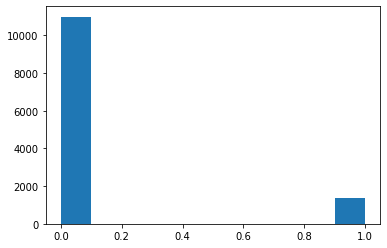

In [74]:
plt.hist(predictionsRF)
plt.show()

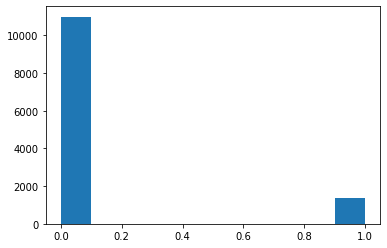

In [75]:
plt.hist(predictionsSVC)
plt.show()

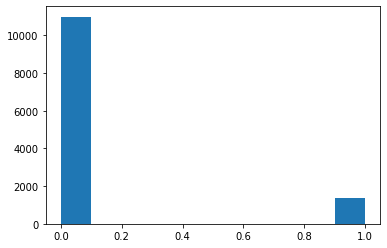

In [76]:
plt.hist(predictionsGBC)
plt.show()

In [77]:
from math import sqrt

In [78]:
print('Model RF:')
accRF = accuracy_score(y_test, predictionsRF)
print('Accuracy:', accRF)
precRF = precision_score(y_test, predictionsRF)
print('Precision:', precRF)
matRF = confusion_matrix(y_test, predictionsRF)
print('Correlation Matrix:')
print(matRF)

Model RF:
Accuracy: 1.0
Precision: 1.0
Correlation Matrix:
[[10986     0]
 [    0  1371]]


In [79]:
print('Model SVC')
accSVC = accuracy_score(y_test, predictionsSVC)
print('Accuracy:', accSVC)
precSVC = precision_score(y_test, predictionsSVC)
print('Precision:', precSVC)
matSVC = confusion_matrix(y_test, predictionsSVC)
print('Correlation Matrix:')
print(matSVC)

Model SVC
Accuracy: 0.9910981629845431
Precision: 0.9592134013109979
Correlation Matrix:
[[10930    56]
 [   54  1317]]


In [80]:
print('Model GBC:')
accGBC = accuracy_score(y_test, predictionsGBC)
print('Accuracy:', accGBC)
precGBC = precision_score(y_test, predictionsGBC)
print('Precision:', precGBC)
matGBC = confusion_matrix(y_test, predictionsGBC)
print('Correlation Matrix:')
print(matGBC)

Model GBC:
Accuracy: 1.0
Precision: 1.0
Correlation Matrix:
[[10986     0]
 [    0  1371]]


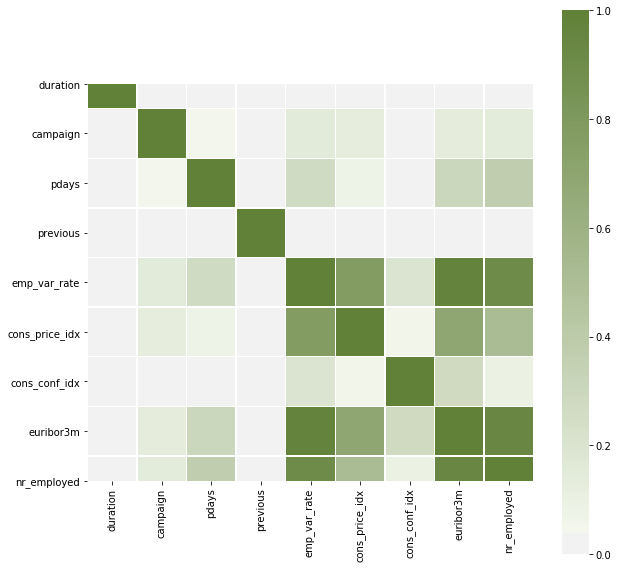

In [81]:
corr = dataOr.drop('age',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(30, 110, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

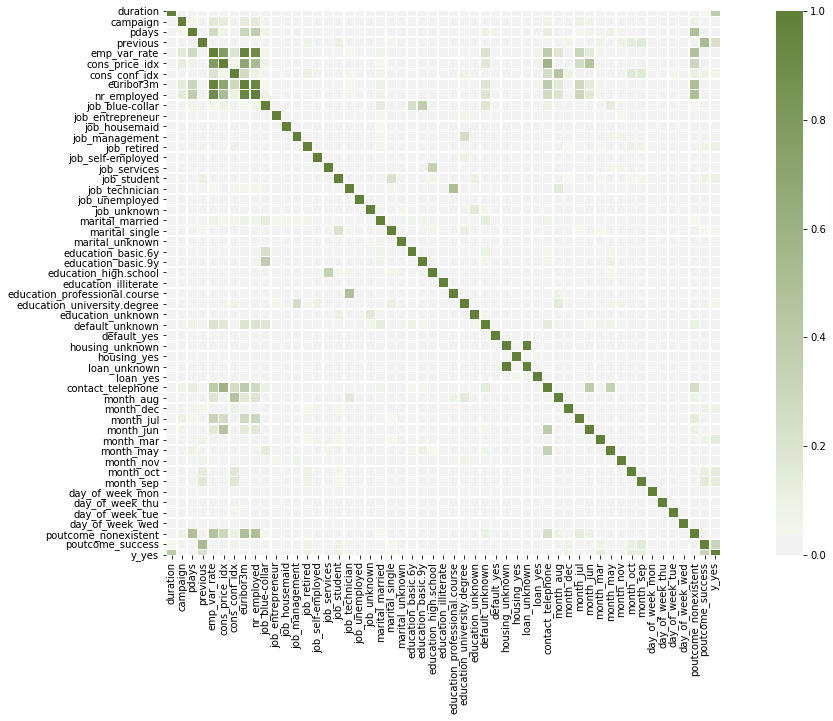

In [82]:
corr = data.drop('age',axis=1).corr()
f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(30, 110, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

In [83]:
covMat = data.cov()
print(covMat)

                                      age      duration   campaign  \
age                            108.602451     -2.339147   0.132603   
duration                        -2.339147  67225.728877 -51.494888   
campaign                         0.132603    -51.494888   7.672975   
pdays                          -66.945400  -2305.683015  27.224921   
previous                         0.125661      2.648520  -0.108494   
emp_var_rate                    -0.006069    -11.391802   0.656017   
cons_price_idx                   0.005168      0.797272   0.204971   
cons_conf_idx                    6.239801     -9.807412  -0.176061   
euribor3m                        0.194622    -14.793831   0.649236   
nr_employed                    -13.346160   -837.439866  28.838822   
job_blue-collar                 -0.105219      1.405917  -0.002052   
job_entrepreneur                 0.060067      0.176148  -0.001127   
job_housemaid                    0.140930     -0.201523   0.001854   
job_management      

In [84]:
covMat = finalDf.cov()
print(covMat)

                PC1           PC2           PC3           PC4           PC5  \
PC1    3.576572e+04 -1.808964e-13 -3.179820e-15  1.102338e-13 -7.066266e-15   
PC2   -1.808964e-13  4.396159e+03 -6.006326e-15  1.837229e-14  4.946386e-15   
PC3   -3.179820e-15 -6.006326e-15  1.089738e+02  1.766567e-15  2.208208e-16   
PC4    1.102338e-13  1.837229e-14  1.766567e-15  2.054239e+01 -6.182983e-16   
PC5   -7.066266e-15  4.946386e-15  2.208208e-16 -6.182983e-16  7.506094e+00   
PC6   -1.554579e-14  3.533133e-15  7.728729e-17  0.000000e+00  4.416416e-16   
PC7    4.416416e-16 -5.299700e-15 -1.324925e-16 -7.949549e-16  2.484234e-17   
PC8   -5.829670e-15  1.766567e-16  1.545746e-16  1.766567e-16 -8.556807e-17   
PC9   -1.810731e-15  0.000000e+00  1.766567e-16  2.208208e-16 -2.346221e-17   
PC10   1.832813e-15  7.949549e-16 -1.104104e-16 -1.987387e-16  5.002972e-17   
PC11  -1.413253e-15 -1.236597e-15 -5.520520e-17  2.649850e-16  2.622247e-17   
PC12  -7.066266e-16  7.066266e-16 -8.832833e-17 -2.2

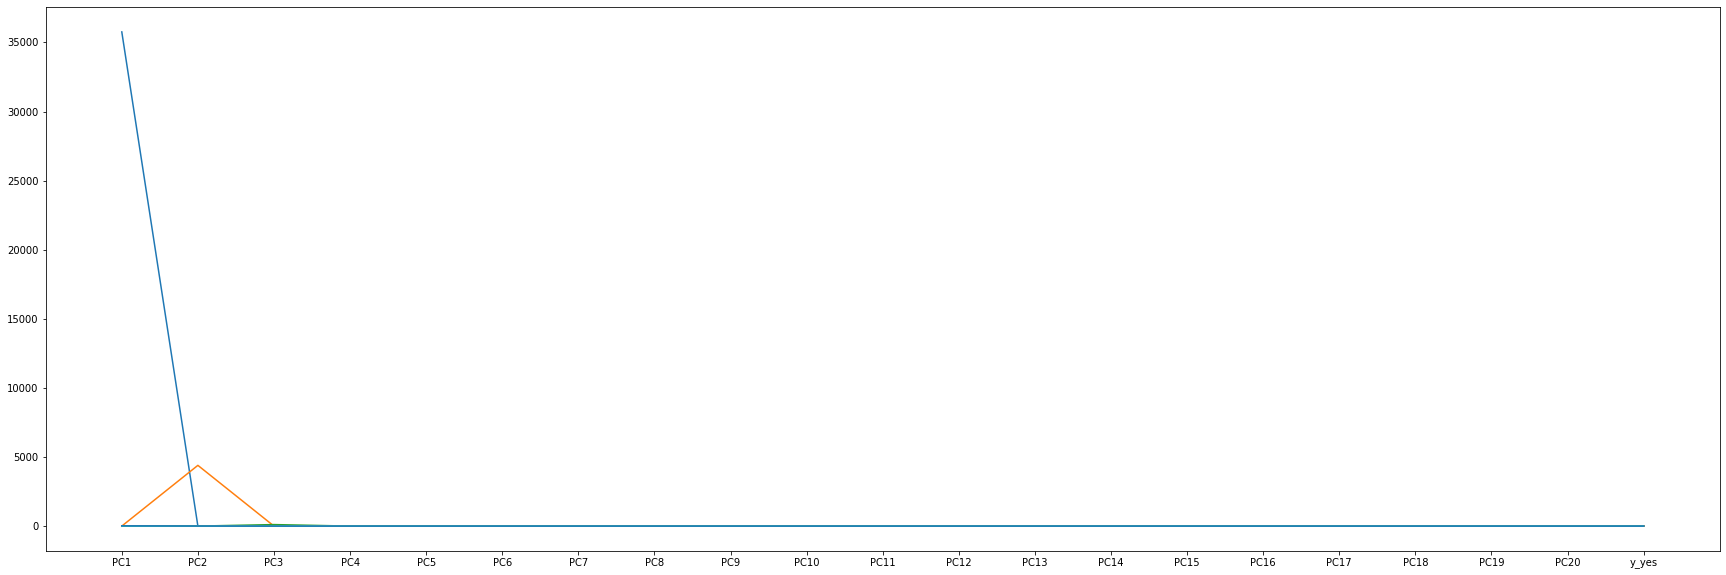

In [85]:
plt.figure(figsize = (30,10))
plt.plot(covMat)